In [1]:
from main import *

## Two - Tetra  $\mu_r = 32$ 

CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/


/Users/paulledger/Coding/Rodrigues_Angles/src/StableAngle.py:10: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos((np.trace(Q)-1.)/2.)
/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_Angles/src/Commeasure.py:37: RuntimeWarning: divide by zero encountered in scalar divide
  Comexactconst[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation)


10.0 [-9.82944451e-15 -1.31090158e-14 -1.51649078e-14] [1.99280639e-11 2.72589362e-11 3.11276369e-11]
10.0 -1.855793882574943755e-28 7.953630577069115747e-27 5.975491006419178083e-26
15.117750706156622 [-2.24651660e-14 -2.99600846e-14 -3.46583943e-14] [3.01267363e-11 4.12093625e-11 4.70579650e-11]
15.117750706156622 -6.4065085613634173724e-28 2.7478545803622591693e-26 2.0644633610531148215e-25
22.854638641349908 [-5.13437851e-14 -6.84724795e-14 -7.92097653e-14] [4.55448008e-11 6.22992260e-11 7.11409878e-11]
22.854638641349908 -2.212302917802696688e-27 9.493652482887069882e-26 7.1326283918029017483e-25
34.55107294592218 [-1.17344755e-13 -1.56490671e-13 -1.81029509e-13] [6.88533281e-11 9.41822059e-11 1.07548928e-10]
34.55107294592218 -7.6409957503208177246e-27 3.280038432612552733e-25 2.4643198064387386694e-24
52.23345074266843 [-2.68186054e-13 -3.57650624e-13 -4.13731702e-13] [1.04090169e-10 1.42381583e-10 1.62588947e-10]
52.23345074266843 -2.639400923938780209e-26 1.1332507765603766263

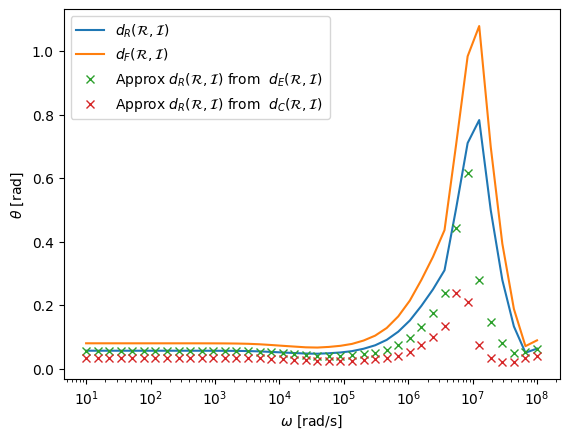

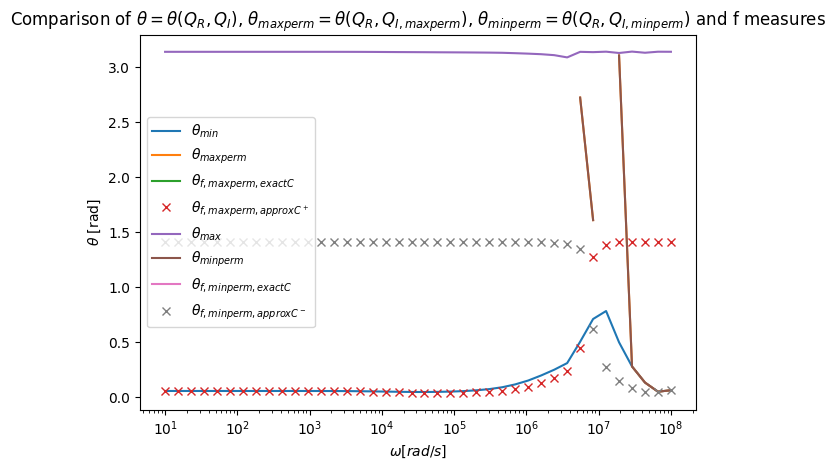

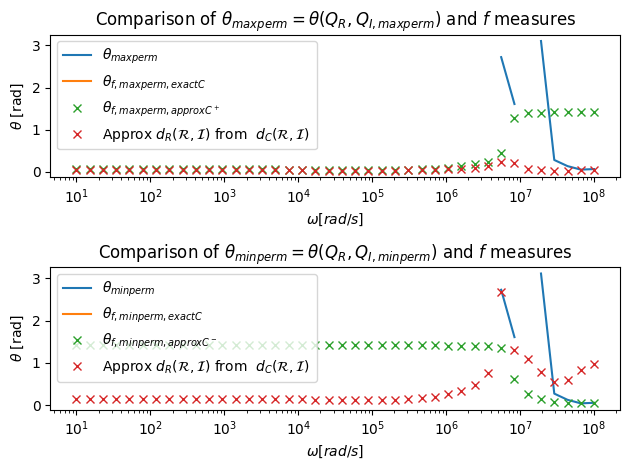

Computing F measure Tilde
10.0 [2.08178896e-07 1.90092644e-07 1.29293589e-07] [1.99280639e-11 2.72589362e-11 3.11276369e-11]
10.0 -1.7456688786181200377e-18 1.325879994592551534e-19 8.834817426616801741e-19
15.117750706156622 [2.08178876e-07 1.90092627e-07 1.29293576e-07] [3.01267363e-11 4.12093625e-11 4.70579650e-11]
15.117750706156622 -2.6390574671046497306e-18 2.0044313778485659616e-19 1.3356250488452780769e-18
22.854638641349908 [2.08178832e-07 1.90092589e-07 1.29293547e-07] [4.55448008e-11 6.22992260e-11 7.11409878e-11]
22.854638641349908 -3.989657074194926389e-18 3.0302461392396198545e-19 2.019162503023854021e-18
34.55107294592218 [2.08178731e-07 1.90092500e-07 1.29293480e-07] [6.88533281e-11 9.41822059e-11 1.07548928e-10]
34.55107294592218 -6.031449586003782013e-18 4.5810393818210840805e-19 3.0525121319586899559e-18
52.23345074266843 [2.08178501e-07 1.90092298e-07 1.29293328e-07] [1.04090169e-10 1.42381583e-10 1.62588947e-10]
52.23345074266843 -9.11814505715926077e-18 6.92546255

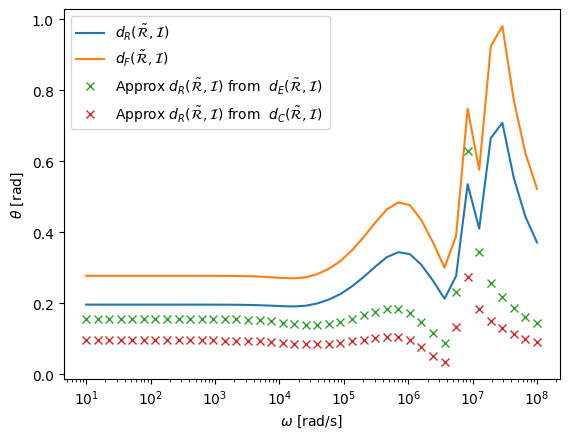

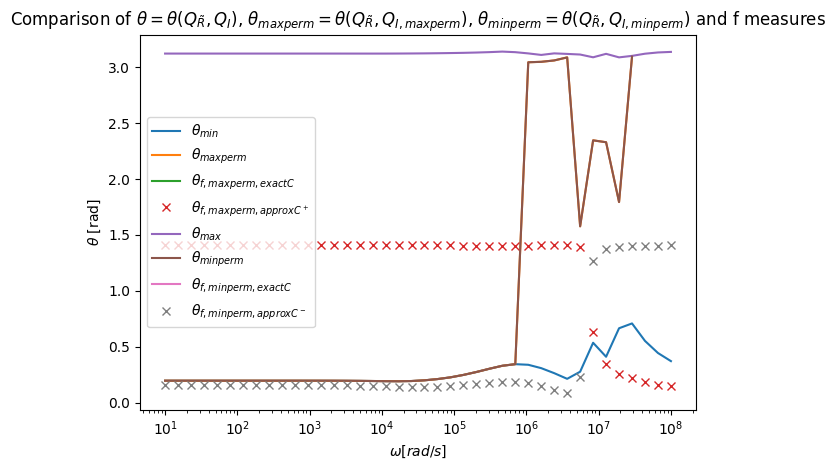

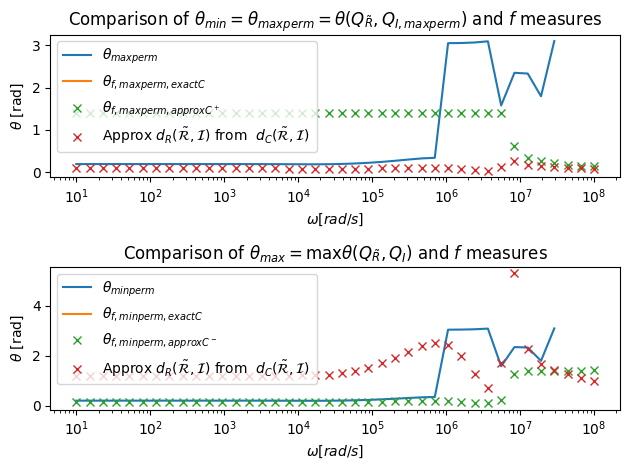

10.0 [2.08178911e-07 1.90092657e-07 1.29293599e-07] [1.99280639e-11 2.72589362e-11 3.11276369e-11]
10.0 -1.7456689949498600088e-18 1.3258801313315386188e-19 8.834817995281709151e-19
15.117750706156622 [2.08178911e-07 1.90092657e-07 1.29293599e-07] [3.01267363e-11 4.12093625e-11 4.70579650e-11]
15.117750706156622 -2.6390578688746642033e-18 2.0044318502715425848e-19 1.3356252453146398112e-18
22.854638641349908 [2.08178911e-07 1.90092657e-07 1.29293599e-07] [4.55448008e-11 6.22992260e-11 7.11409878e-11]
22.854638641349908 -3.9896584622871969902e-18 3.030247771455332122e-19 2.0191631818215831606e-18
34.55107294592218 [2.08178911e-07 1.90092657e-07 1.29293599e-07] [6.88533281e-11 9.41822059e-11 1.07548928e-10]
34.55107294592218 -6.0314543821140026883e-18 4.581045021157611829e-19 3.0525144772128242874e-18
52.23345074266843 [2.08178911e-07 1.90092657e-07 1.29293599e-07] [1.04090169e-10 1.42381583e-10 1.62588947e-10]
52.23345074266843 -9.118161627659046924e-18 6.9254820383509699106e-19 4.61469

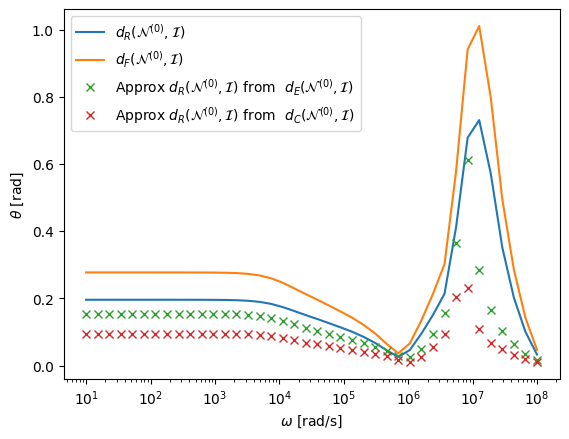

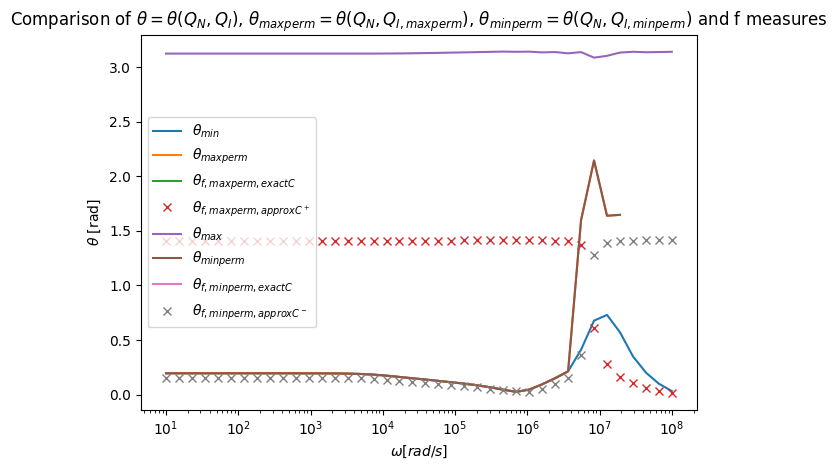

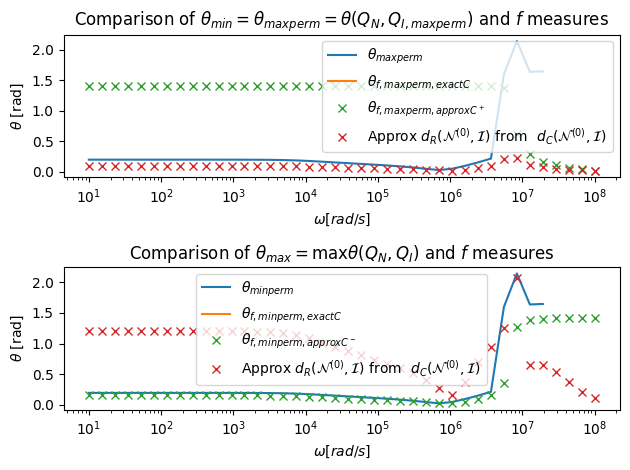

In [2]:
DirList=["CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/"]
SaveRIList=[]
SaveRtilde=[]

MaxOmega=1e8
for directory in DirList:
    print(directory)
    RIResults,RtildeIResults, N0IResults=main(directory,MaxOmega, Figures="On")

dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max', 'RIfmeasapprx_den_const_max', 'RIfmeasapprx_den_const_min', 'RIcommeapprx_den_const_max', 'RIcommeapprx_den_const_min', 'URstore', 'UIstore', 'URtildestore', 'UN0store', 'QRstore', 'QIstore', 'QRtildestore', 'QN0store', 'AnglestoreRIfmeasfullconstsortedmindiff', 'AnglestoreRIfmeasfullconstsortedmaxdiff', 'AnglestoreRIcommeasfullconstsortedmindiff', 'AnglestoreRIcommeasfullconstsortedmaxdiff'])


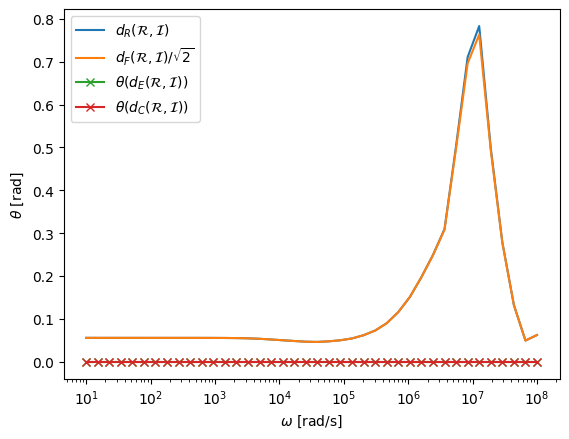

In [4]:
print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmaxdiff_max,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ ')
plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmaxdiff_max,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ ')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.2)
plt.legend()
#plt.savefig("CSG_TwoTetra_dRanddE_metrics_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max', 'RIfmeasapprx_den_const_max', 'RIfmeasapprx_den_const_min', 'RIcommeapprx_den_const_max', 'RIcommeapprx_den_const_min'])


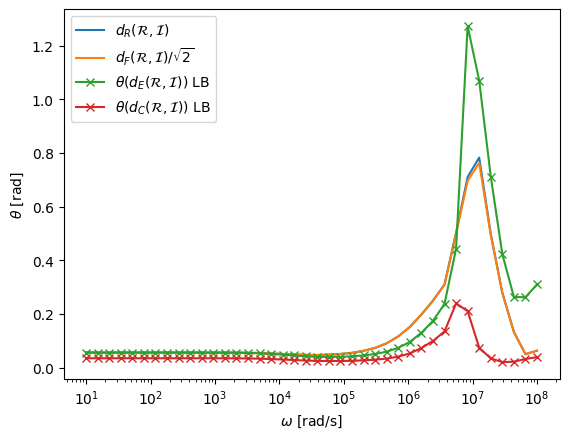

In [5]:

print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

AnglestoreRIfmeasupper=np.fmax(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])
AnglestoreRIfmeaslower=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])

AnglestoreRIfmeasupper=np.fmax(AnglestoreRIfmeasupper,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIfmeaslower=np.fmin(AnglestoreRIfmeaslower,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIfmeasavg=(AnglestoreRIfmeasupper+AnglestoreRIfmeaslower)/2

AnglestoreRIcommmupper=np.fmax(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
AnglestoreRIcommmlower=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2

AnglestoreRIcommmupper=np.fmax(AnglestoreRIcommmupper,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
AnglestoreRIcommmlower=np.fmin(AnglestoreRIcommmlower,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeaslower,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ LB')

plt.semilogx(Frequencies,AnglestoreRIcommmlower,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ LB')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.2)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()


dict_keys(['Frequencies', 'MinAnglestoreRtildeI', 'AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRtildeIfmeasapprxconstsortedmindiff_min', 'AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRtildeIfmeasapprxconstsortedmindiff_max', 'AnglestoreRtildeIfmeasfullconstsortedmindiff', 'AnglestoreRtildeIfmeasfullconstsortedmaxdiff', 'dFMinAnglestoreRtildeI', 'dFMaxAnglestoreRtildeI', 'AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRtildeIcommeasapprxconstsortedmindiff_min', 'AnglestoreRtildeIcommeasapprxconstsortedmindiff_max'])


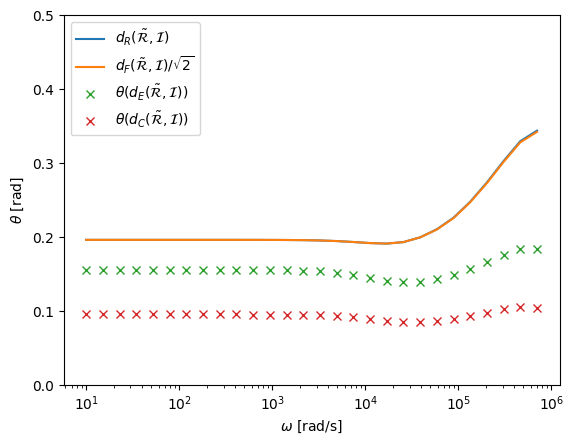

In [5]:
print(RtildeIResults.keys())

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max,'x',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ ')
plt.semilogx(Frequencies,AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max,'x',label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ ')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(0,0.5)
plt.legend()
#plt.savefig("CSG_TwoTetra_dRanddE_metrics_tilde_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

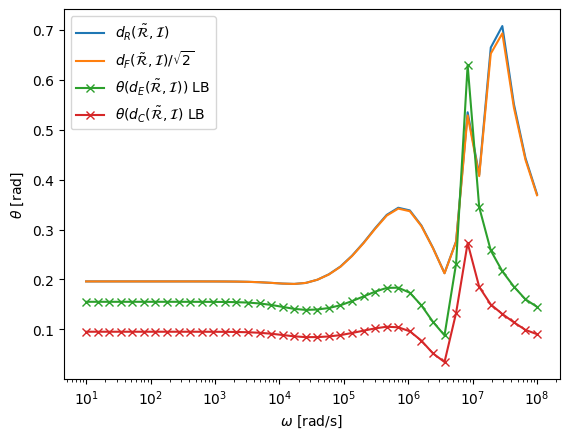

In [6]:

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
#AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"]
dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
#AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIfmeasupper=np.fmax(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIfmeaslower=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])

AnglestoreRtildeIfmeasupper=np.fmax(AnglestoreRtildeIfmeasupper,RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"])
AnglestoreRtildeIfmeaslower=np.fmin(AnglestoreRtildeIfmeaslower,RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"])

AnglestoreRtildeIfmeasavg=(AnglestoreRtildeIfmeasupper+AnglestoreRtildeIfmeaslower)/2

AnglestoreRtildeIfmeasfullconstsortedmindiff= RtildeIResults["AnglestoreRtildeIfmeasfullconstsortedmindiff"]

AnglestoreRtildeIcommmupper=np.fmax(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"])
AnglestoreRtildeIcommmlower=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"])

AnglestoreRtildeIcommmupper=np.fmax(AnglestoreRtildeIcommmupper,RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIcommmlower=np.fmin(AnglestoreRtildeIcommmlower,RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])


AnglestoreRtildeIcommmavg = (AnglestoreRtildeIcommmupper+AnglestoreRtildeIcommmlower )/2

AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeaslower,'-x',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreRtildeIcommmlower,'-x',label=r'$\theta(d_C(\tilde{\cal R},{\cal I})$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.5)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_tilde_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

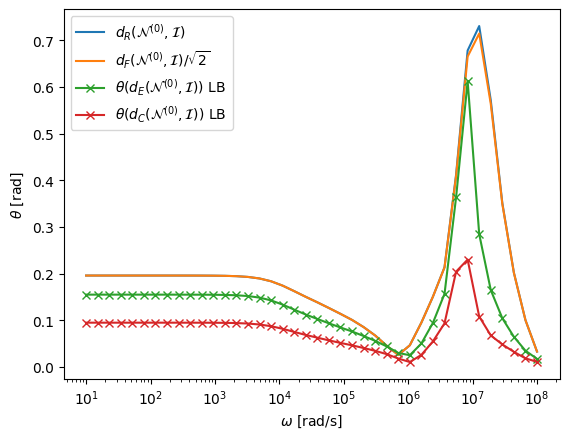

In [7]:

Frequencies=N0IResults["Frequencies"]
MinAnglestoreN0I=N0IResults["MinAnglestoreN0I"]
AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
AnglestoreN0Icommeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreN0I = N0IResults["dFMinAnglestoreN0I"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0I,label=r'$d_R({\cal N}^{(0)},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0I/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreN0Icommeasapprxconstsortedmaxdiff_max,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.5)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_N0_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

In [11]:
## Loop over different Permeabilities and compare results

DirList=["CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_2_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_8_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_16_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_64_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_128_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/"]

murlist=[1,2,8,16,32,64,128]
Nresults=len(Frequencies)
Results=np.zeros((7,Nresults))
TildeResults=np.zeros((7,Nresults))
N0Results=np.zeros((7,Nresults))


dRresults=np.zeros((7,Nresults))
dRTilderesults=np.zeros((7,Nresults))
dRN0results=np.zeros((7,Nresults))

dFresults=np.zeros((7,Nresults))
dFTilderesults=np.zeros((7,Nresults))
dFN0results=np.zeros((7,Nresults))

dCresults=np.zeros((7,Nresults))
dCTilderesults=np.zeros((7,Nresults))
dCN0results=np.zeros((7,Nresults))


In [12]:
MaxOmega=1e8
count=0
for directory in DirList:
    print(directory)
    RIResults,RtildeIResults,N0IResults=main(directory,MaxOmega,Figures="Off")
    
    AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
    Results[count,:] =AnglestoreRIfmeasapprxconstsortedmaxdiff_max
    
    AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
    TildeResults[count,:] =AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max
    
    AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
    N0Results[count,:] =AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max
    
    
    dRresults[count,:] = RIResults["MinAnglestoreRI"]
    dFresults[count,:] = RIResults["dFMinAnglestoreRI"]
    dCresults[count,:] = np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
    
    dRTilderesults[count,:] = RtildeIResults["MinAnglestoreRtildeI"]
    dFTilderesults[count,:] = RtildeIResults["dFMinAnglestoreRtildeI"]
    dCTilderesults[count,:] = np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

    dRN0results[count,:] = N0IResults["MinAnglestoreN0I"]
    dFN0results[count,:] = N0IResults["dFMinAnglestoreN0I"]
    dCN0results[count,:] = np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])
    
        
    count+=1
Frequencies=RtildeIResults["Frequencies"]


CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
6
R [-2.34392903e-14 -1.11520443e-14 -1.01875052e-14] [[-0.2263778   0.91156142  0.34323295]
 [ 0.27331088 -0.27877831  0.92064315]
 [-0.93490869 -0.30222247  0.18603043]] 1
Rtilde [-2.34392322e-14 -1.11519862e-14 -1.01874471e-14] [[-0.2263778   0.91156142  0.34323295]
 [ 0.27331088 -0.27877831  0.92064315]
 [-0.93490869 -0.30222247  0.18603043]] 1
I [3.84161605e-11 2.23215688e-11 2.08243021e-11] [[ 0.23052942 -0.91481352  0.33162087]
 [-0.27754854  0.2648251   0.92349038]
 [ 0.93264302  0.30493259  0.19285518]] 1
7
R [-5.35699031e-14 -2.54870505e-14 -2.32828014e-14] [[-0.22639253  0.91161565  0.34307919]
 [ 0.27332916 -0.27861414  0.92068742]
 [-0.93489978 -0.3022103   0.18609498]] 1
Rtilde [-5.35698449e-14 -2.54869924e-14 -2.32827432e-14] [[-0.22639253  0.91161565  0.34307919]
 [ 0.27332916 -0.278

/Users/paulledger/Coding/Rodrigues_angles/Rodrigues_Angles/src/Fmeasure.py:31: RuntimeWarning: divide by zero encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_angles/Rodrigues_Angles/src/Fmeasure.py:31: RuntimeWarning: invalid value encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_angles/Rodrigues_Angles/src/Commeasure.py:37: RuntimeWarning: invalid value encountered in scalar divide
  Comexactconst[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_angles/Rodrigues_Angles/src/Commeasure.py:67: RuntimeWarning: invalid value encountered in scalar divide
  Comapproxconst_min[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation_min)
/Users/paulledger/Coding/Rodrigues_angles/Rodrigues_Angles/src/Commeasure.py

-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
-0.0
0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
CSG_TwoTetra/al_0.001_mu_2_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_2_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
6
R [-6.47233688e-14 -4.1

CSG_TwoTetra/al_0.001_mu_16_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_16_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
6
R [-6.96866205e-13 -8.67339634e-13 -9.88421911e-13] [[ 0.41626459 -0.89861318 -0.13862954]
 [-0.46470442 -0.34131048  0.81704159]
 [ 0.78152005  0.27568372  0.55966498]] 1
Rtilde [1.13507057e-07 1.61119593e-07 1.74225427e-07] [[-0.29242341  0.95533407  0.0427242 ]
 [ 0.35009774  0.06537403  0.93442914]
 [-0.88989894 -0.2882066   0.35357719]] 1
I [2.01584668e-10 2.54393693e-10 2.84136621e-10] [[-0.37711335  0.919386   -0.11187001]
 [ 0.43864318  0.28367967  0.85271215]
 [-0.81570686 -0.27249811  0.51026178]] 1
7
R [-1.59263055e-12 -1.98221492e-12 -2.25892102e-12] [[ 0.4162651  -0.89861399 -0.13862274]
 [-0.46469376 -0.34130087  0.81705167]
 [ 0.78152612  0.27569297  0.55965195]] 1
Rtilde [1.13506147e-07 1.61118474e-07 1.74224174e-07] [[-0.29242271  0.9553342   0.04272622]
 [ 0.35009693  0.0653715

6 1.0
[-2.77667383e-12 -3.82225891e-12 -4.45256386e-12] [3.75699672e-10 2.62252213e-10 4.34976663e-10]
[[ 0.36638417 -0.92446483 -0.10548661]
 [-0.42895183 -0.26842131  0.86252555]
 [ 0.82568939  0.27076703  0.4948962 ]] [[ 0.93649419  0.33951228 -0.08780683]
 [ 0.23190974 -0.41176431  0.88128771]
 [-0.26305228  0.84568408  0.46435109]]
0.04770855088697818 1.545152123128955
0.06747007970553151 1.9741920949633942
7 1.0
[-8.73246086e-12 -6.34340849e-12 -1.01725277e-11] [3.96375973e-10 5.67856098e-10 6.57451009e-10]
[[-0.92447139  0.36636895 -0.10548195]
 [-0.26840641 -0.42894561  0.86253328]
 [ 0.27075939  0.82569938  0.49488371]] [[ 0.33950342  0.93649791 -0.08780149]
 [-0.41175888  0.23189844  0.88129322]
 [ 0.84569028 -0.26304902  0.46434164]]
0.04770244811439439 1.5451585382898956
0.06746144908177544 1.974198591840433
6 1.0
[2.08610346e-07 1.39067125e-07 2.30250125e-07] [2.62252213e-10 3.75699672e-10 4.34976663e-10]
[[ 0.95770076 -0.28667014  0.02508973]
 [ 0.07986862  0.34855737  0.

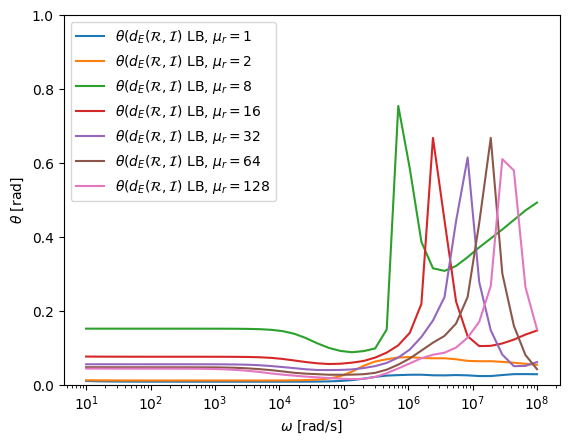

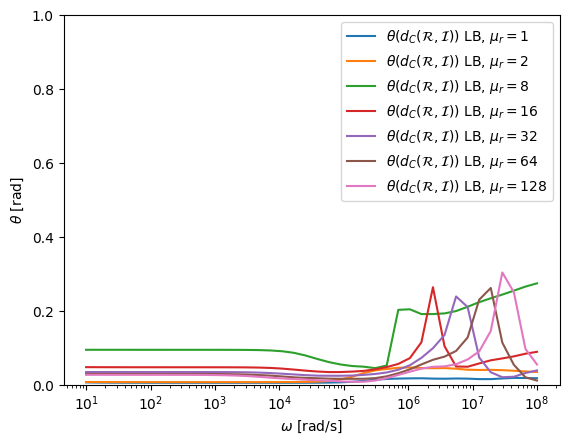

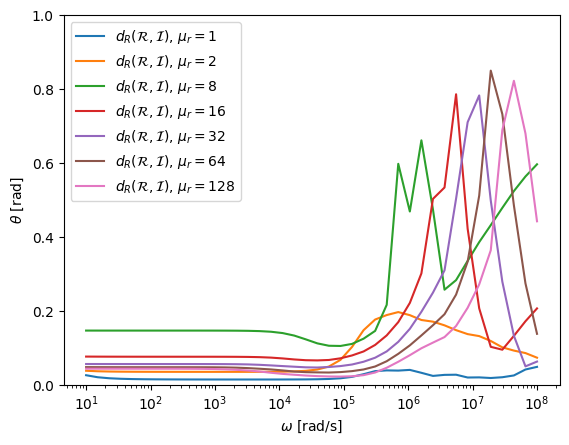

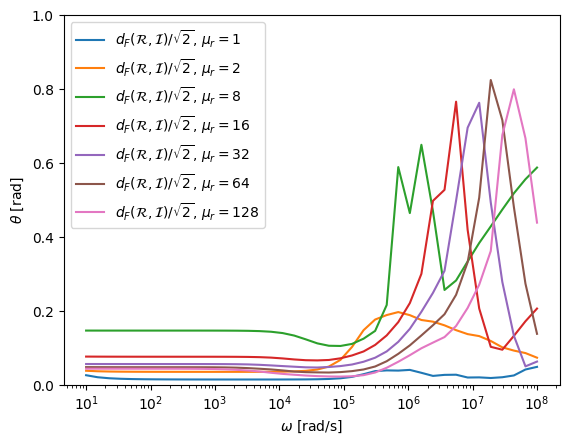

In [19]:
fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,Results[count,:],label=r'$\theta(d_E({\cal R},{\cal I})$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metrics_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dCresults[count,:],label=r'$\theta(d_C({\cal R},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metricsdC_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dRresults[count,:],label=r'$d_R({\cal R},{\cal I})$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dR_metrics_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()


fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dFresults[count,:]/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dF_metrics_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()



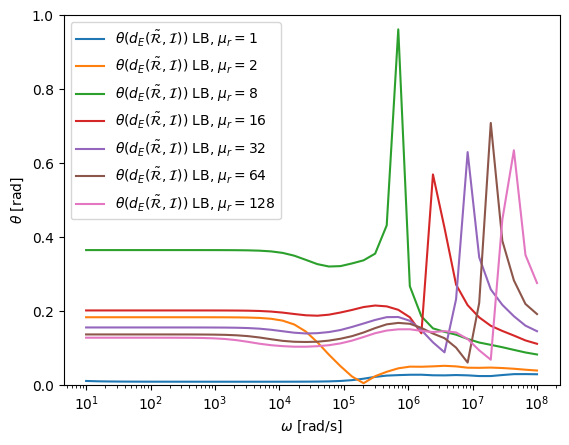

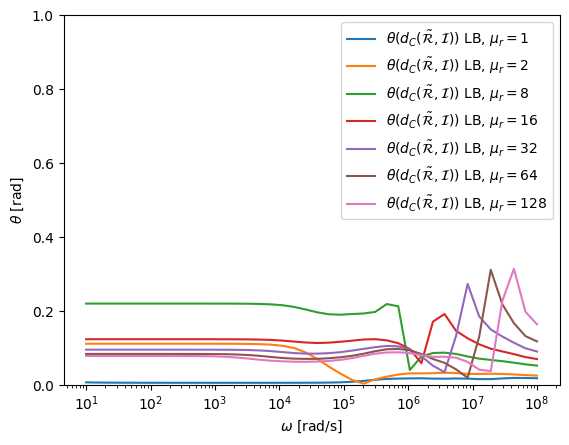

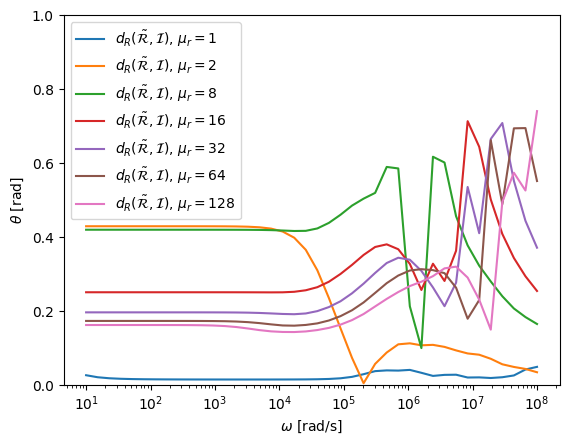

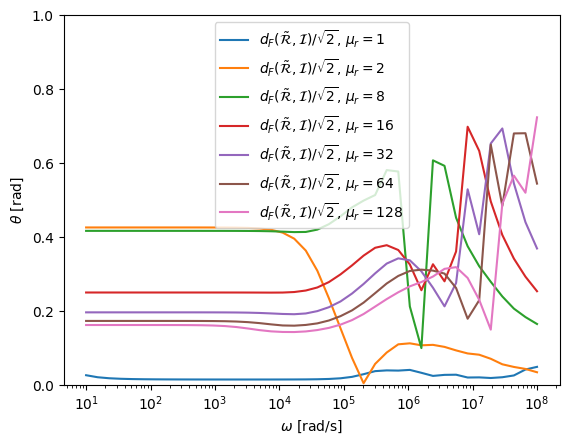

In [18]:
fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,TildeResults[count,:],label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metrics_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dCTilderesults[count,:],label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metricsdC_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()


fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dRTilderesults[count,:],label=r'$d_R(\tilde{\cal R},{\cal I})$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dR_metrics_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dFTilderesults[count,:]/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dF_metrics_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

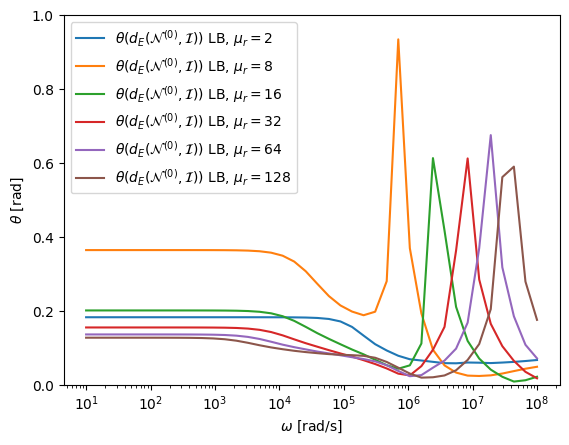

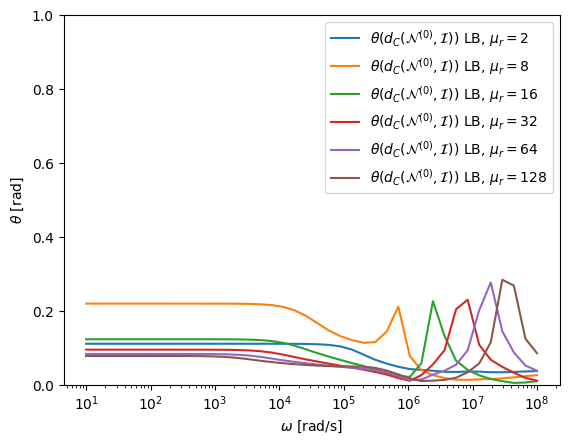

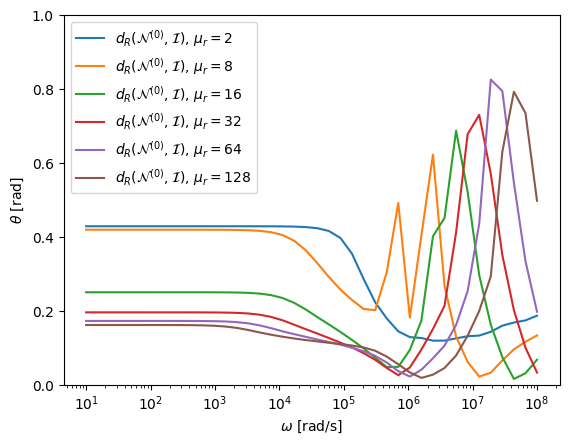

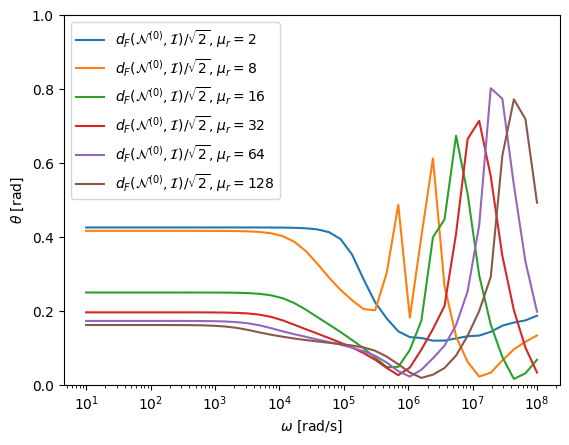

In [17]:
fig=plt.figure()
for count in range(1,7):
    plt.semilogx(Frequencies,N0Results[count,:],label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metrics_N0_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(1,7):
    plt.semilogx(Frequencies,dCN0results[count,:],label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metricsdC_N0_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()


fig=plt.figure()
for count in range(1,7):
    plt.semilogx(Frequencies,dRN0results[count,:],label=r'$d_R({\cal N}^{(0)},{\cal I})$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dR_metrics_N0_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(1,7):
    plt.semilogx(Frequencies,dFN0results[count,:]/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dF_metrics_N0_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()